# Summer 2022 Data Science Intern Challenge 

## Q1: Sneaker Shop Data Analysis

In [11]:
# Import neccessary packages
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('DSS Intern Challenge.csv') # Load dataset

In [12]:
# Generate a column with average item price
df['item_avg_price'] = df['order_amount']/df['total_items'] 

In [13]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_avg_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [14]:
# Check the statistics of the dataset
df.describe() 

,order_id,shop_id,user_id,order_amount,total_items,item_avg_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


* Three noticeable max values in order_amount (704,000), total_items (2000) and item_avg_price (25,725) need further investigation. 
* Abnormal values in item_avg_price and total_items might be the reason of abnormal order_amount. 

### Step 1. To start the investigation, check if there is any other value requires our attention.

In [15]:
df['total_items'].unique() # Check the unique item amount

array([   2,    1,    3, 2000,    4,    5,    6,    8], dtype=int64)

In [16]:
tmp = df['order_amount'].unique()
tmp.sort()
tmp[-10:] # Check largest ten order amount

array([  1064,   1086,   1408,   1760,  25725,  51450,  77175, 102900,
       154350, 704000], dtype=int64)

In [17]:
tmp2 = df['item_avg_price'].unique()
tmp2.sort()
tmp2[-10:] # Check largest ten item price

array([  181.,   184.,   187.,   190.,   193.,   195.,   196.,   201.,
         352., 25725.])

### Step 2. Check who are selling and buying those $20k+ sneakers. 

In [18]:
twenty_k_shoes = df[df['item_avg_price']==25725] # Check only the transactions with unit price $25725

In [19]:
twenty_k_shoes.nunique() # Check unique shop_id amount

order_id          46
shop_id            1
user_id           45
order_amount       5
total_items        5
payment_method     3
created_at        46
item_avg_price     1
dtype: int64

In [20]:
twenty_k_shoes.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_avg_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0


* It seems that Shop#78 is the only shop participated in such transactions. 

In [21]:
shop_78 = df[df['shop_id']==78]

In [22]:
shop_78.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_avg_price
count,46.000000,46.0,46.000000,46.000000,46.000000,46.0
mean,2663.021739,78.0,867.739130,49213.043478,1.913043,25725.0
std,1338.520020,0.0,81.314871,26472.227449,1.029047,0.0
min,161.000000,78.0,707.000000,25725.000000,1.000000,25725.0
25%,1428.250000,78.0,812.500000,25725.000000,1.000000,25725.0
50%,2796.500000,78.0,866.500000,51450.000000,2.000000,25725.0
75%,3720.250000,78.0,935.750000,51450.000000,2.000000,25725.0
max,4919.000000,78.0,997.000000,154350.000000,6.000000,25725.0


In [23]:
shop_78['user_id'].nunique() # Check how many unique users are buying sneakers from Shop#78

45

* All the items in Shop#78 seems to be wrongly priced. 

* Since there are 45 unique users, we rule out the possibility that those users are all bots, for the time being.

### Step 3. Check the bulk orders

In [24]:
df[df['total_items']==2000] # Check the orders with 2000 items

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_avg_price
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


* The transcations all happened at 4:00AM in different days, from a single user paying with credit card. It is very likely that the user is a bot. 

### Step 4. Check the distribution and decide metric

Draw a histogram of order_amount with abnormal data removed:

<AxesSubplot:>

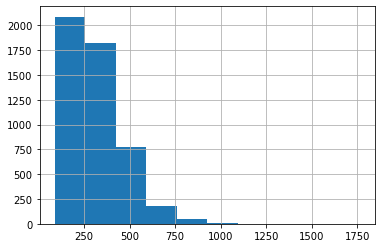

In [25]:
df[df['order_amount']<25725]['order_amount'].hist() # 

From the histogram, it is clear that the data is right-skewed. In this case, median is a better statistic to reflect the dataset, comparing with the average value for the cleaned data.

In [26]:
df['order_amount'].median()

284.0

* The value of the median is 284.

## Summary

* Possible wrongly priced items in Shop#78 and automatic bulk orders from User#602 are the reason of the abnormal high AOV.
* Median should be reported for the dataset.
* The median of the order amount is /b $284.

# Q2: SQL Challanges

a. Answer: 54.
```mysql
SELECT COUNT(*)
FROM Orders, Shippers
WHERE Orders.ShipperId = Shippers.ShipperId AND ShipperName = "Speedy Express";
```


b. Answer: Peacock, with 40 orders.
```mysql
SELECT LastName, COUNT(*)
FROM Orders
JOIN Employees
ON Orders.EmployeeID=Employees.EmployeeID
GROUP BY LastName
ORDER BY COUNT(*) DESC
LIMIT 1
```

c. Answer: Boston Crab Meat.
    
```mysql
SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity
FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p
WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID
GROUP BY p.ProductID
ORDER BY TotalQuantity DESC
LIMIT 1;
```

